# loop through a series of fits files and plot

In [55]:
import glob
import numpy as np
from astropy.io import fits
from astropy.visualization import ImageNormalize, MinMaxInterval, PercentileInterval
from astropy.visualization import SqrtStretch, AsinhStretch
%matplotlib inline

In [56]:
def readfits(filename, mJy=True):
    hdulist = fits.open(f)
    hd = hdulist[0].header
    im  = hdulist[0].data.squeeze()
    if mJy:
        im *= 1000
        
    return im, hd

In [57]:
def get_plot_size(n):
    ny = int(np.sqrt(n))
    nx = n//ny + 1
    
    return nx, ny

In [58]:
def plotfile(file, Rmap, percentile, cmap='viridis'):
    im, hd = readfits(f)
    x = (1+np.arange(hd['NAXIS1']) - hd['CRPIX1']) * hd['CDELT1'] * 3600
    y = (1+np.arange(hd['NAXIS2']) - hd['CRPIX2']) * hd['CDELT2'] * 3600
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    flag = R > Rmap
    im[flag] = np.nan
    
    ax = fig.add_subplot(ny, nx, i+1)
    norm = ImageNormalize(im, interval=PercentileInterval(percentile), stretch=SqrtStretch())
    ax.imshow(im, norm=norm, extent=[np.max(x), np.min(x), np.min(y), np.max(y)], origin='lower', cmap=cmap)
    ax.set_xlim(1.1*Rmap, -1.1*Rmap)
    ax.set_ylim(-1.1*Rmap, 1.1*Rmap)
    ax.text(0.04, 0.91, hd['OBJECT'], fontsize=10, transform = ax.transAxes)

    return ax

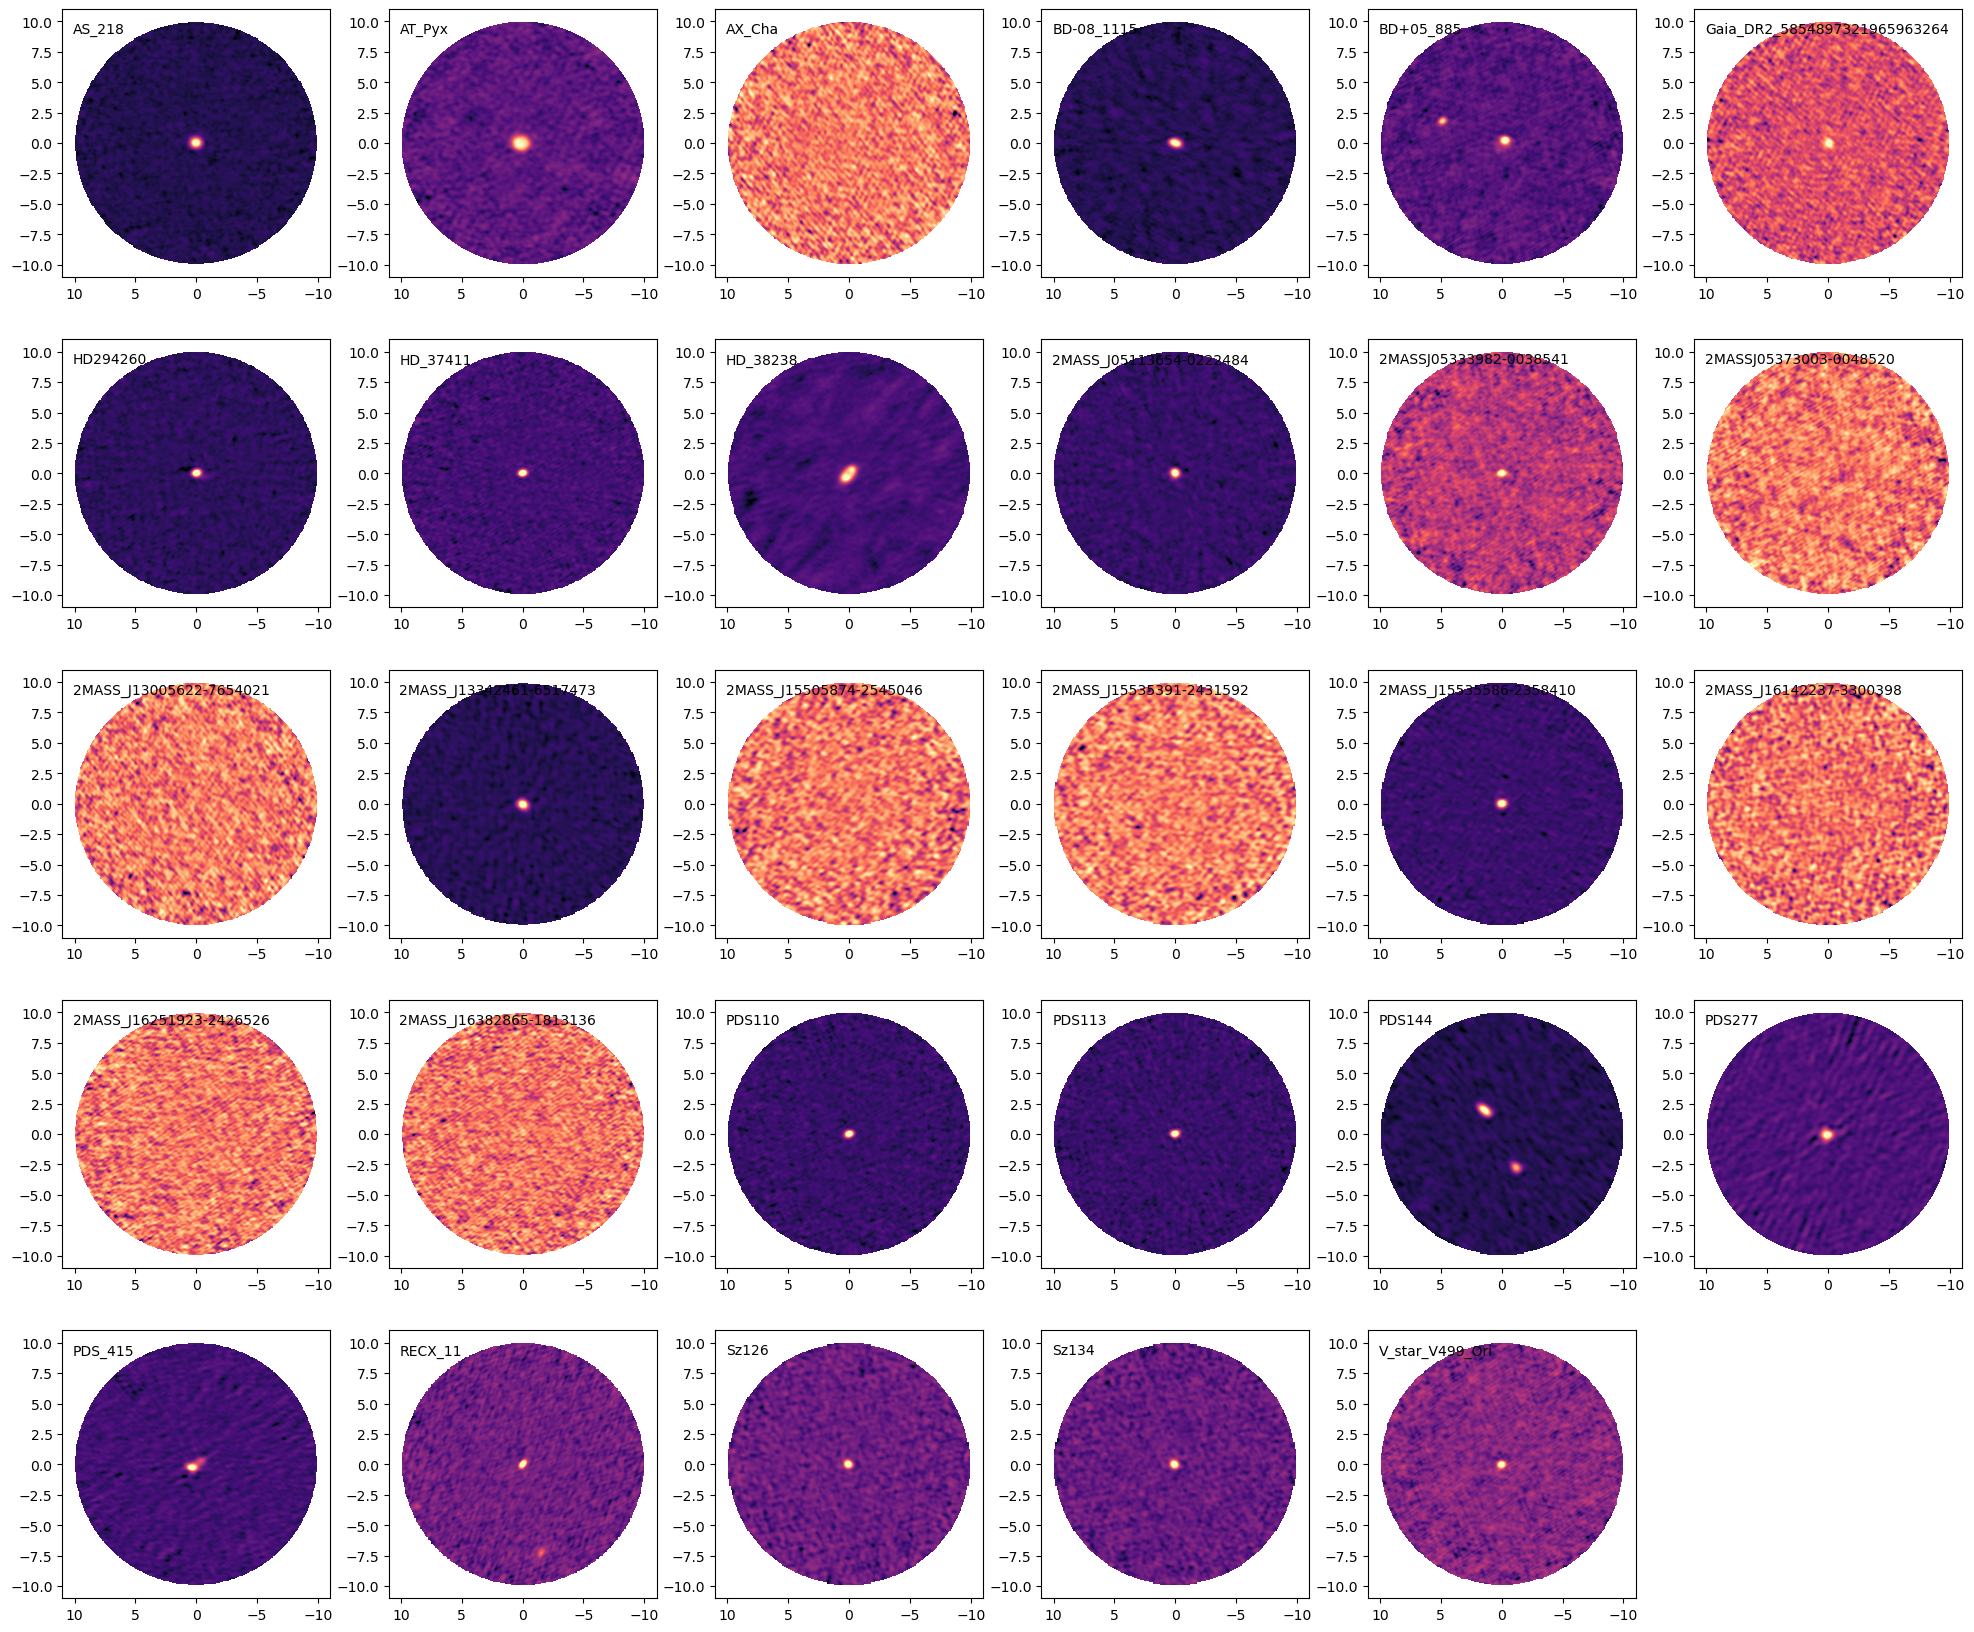

In [65]:
fitslist = glob.glob('*.fits')
n = len(fitslist)
nx, ny = get_plot_size(n)

sx = 20
sy = 20 * ny/nx
fig = plt.figure(figsize=(sx, sy))

# plot in alphabetical order
for i,f in enumerate(sorted(fitslist)):
    ax = plotfile(f, 10, 99.9, cmap='magma')

plt.tight_layout()
plt.savefig('quicklook.png')